In [1]:
import numpy as np

In [2]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
# 定义一个多层感知器（MLP）类，继承自 nn.Module
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()

        # 构建网络结构
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        # 定义前向传播
        x = x.view(x.size(0), -1) # Flatten the input tensor
        out = self.layers(x)
        return out


In [3]:
# 超参数设置
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.0001
batch_size = 64
num_epochs = 10

In [4]:
# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
# 创建模型、损失函数和优化器对象
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
# 开始训练
Loss=[]
Cor=[]
for epoch in range(num_epochs):
    sum_loss=0
    for i, (images, labels) in enumerate(train_loader):
        # 前向传播
        outputs = model(images)

        # 计算损失
        loss = criterion(outputs, labels)
        sum_loss+=loss.item()
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        # # 输出损失信息
        # if (i+1) % 100 == 0:
        #     print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
    # print(sum_loss)
    Loss.append(sum_loss)
    Save_Cor=[]
    cnt=0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            cnt+=1
            Save_Cor.append(100 * correct / labels.size(0))
    Cor.append(np.mean(Save_Cor))



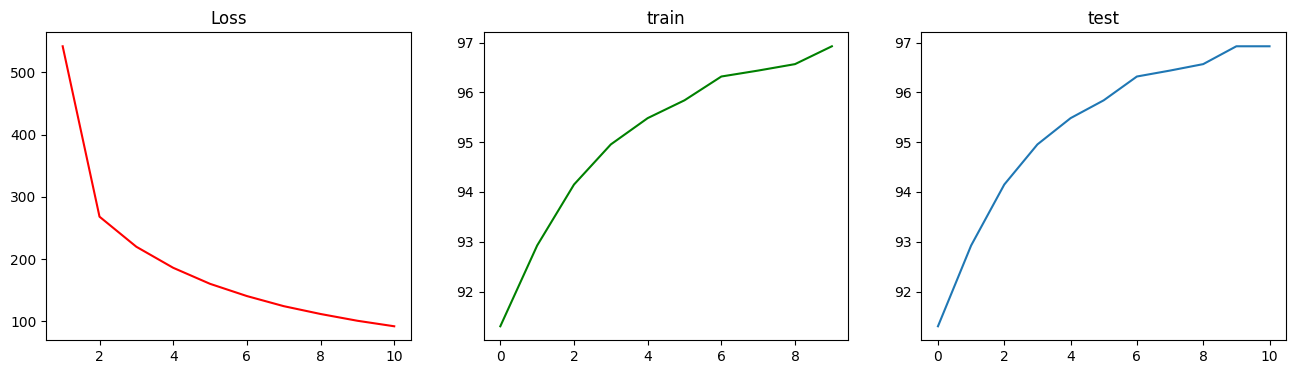

In [7]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.title("Loss")
plt.plot([i for i in range(1, 1 + len(Loss))], Loss,"red")

plt.subplot(132)
plt.title("train")
plt.plot([i for i in range(len(Cor))],Cor,"green")
# 测试模型
# 这行代码是将模型设置为评估（evaluation）模式。在深度学习中，模型在训练和评估阶段可能会有不同的行为和计算方式。下面是对该行代码的详细解释：
# model 是你的深度学习模型对象。
# eval() 是模型对象的一个方法，用于将模型设置为评估模式。
# 在训练阶段，模型通常会使用到一些特定的操作或技巧，如批量归一化（batch normalization）、随机失活（dropout）等，这些操作在训练过程中可以提升模型的效果和泛化能力。
#而在评估阶段，这些操作通常会被关闭或修改，因为它们对模型的输出结果可能会产生一些随机性。
# eval() 方法会将模型切换到评估模式，即将模型的行为调整为在评估阶段应有的行为。例如，它会关闭一些具有随机性质的操作，以便模型的输出结果可以保持一致和可靠。
#需要强调的是，在调用 eval() 方法后，模型的参数不会被修改，而只是影响了模型的计算方式和行为。
plt.subplot(133)
model.eval()
correct = 0
total = 0
Save_Cor=[]

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        Save_Cor.append(100 * correct / labels.size(0))
    Cor.append(np.mean(Save_Cor))

plt.title("test")
plt.plot([i for i in range(len(Cor))],Cor)
plt.show()

# print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

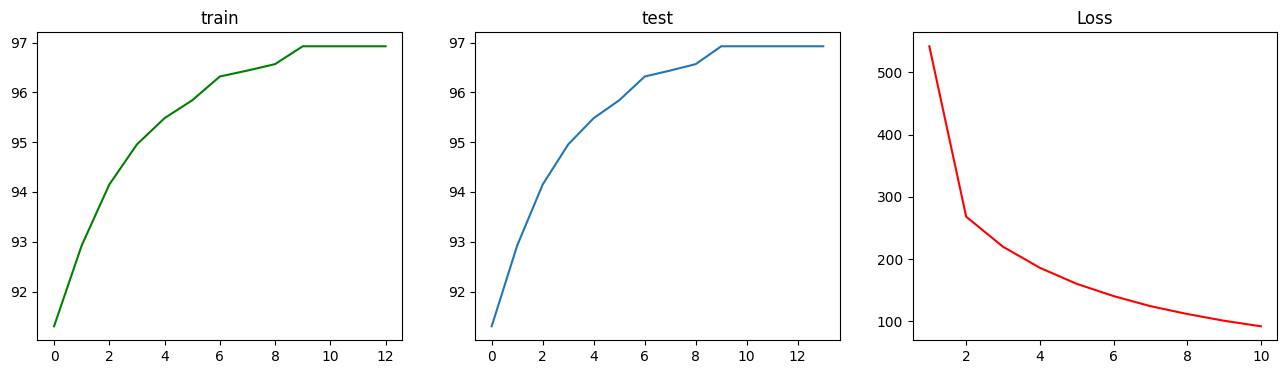

In [10]:
plt.figure(figsize=(16,4))


plt.subplot(131)
plt.title("train")
plt.plot([i for i in range(len(Cor))],Cor,"green")
# 测试模型
# 这行代码是将模型设置为评估（evaluation）模式。在深度学习中，模型在训练和评估阶段可能会有不同的行为和计算方式。下面是对该行代码的详细解释：
# model 是你的深度学习模型对象。
# eval() 是模型对象的一个方法，用于将模型设置为评估模式。
# 在训练阶段，模型通常会使用到一些特定的操作或技巧，如批量归一化（batch normalization）、随机失活（dropout）等，这些操作在训练过程中可以提升模型的效果和泛化能力。
#而在评估阶段，这些操作通常会被关闭或修改，因为它们对模型的输出结果可能会产生一些随机性。
# eval() 方法会将模型切换到评估模式，即将模型的行为调整为在评估阶段应有的行为。例如，它会关闭一些具有随机性质的操作，以便模型的输出结果可以保持一致和可靠。
#需要强调的是，在调用 eval() 方法后，模型的参数不会被修改，而只是影响了模型的计算方式和行为。
plt.subplot(132)
model.eval()
correct = 0
total = 0
Save_Cor=[]

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        Save_Cor.append(100 * correct / labels.size(0))
    Cor.append(np.mean(Save_Cor))

plt.title("test")
plt.plot([i for i in range(len(Cor))],Cor)

plt.subplot(133)
plt.title("Loss")
plt.plot([i for i in range(1, 1 + len(Loss))], Loss,"red")
plt.show()

# print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")